# ¡Hola, James!  

Mi nombre es Carlos Romero, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

# Introducción al proyecto de optimización de datos de marketing en Y.Afisha.

En el marco del curso TripleTen, se nos ha presentado la oportunidad de realizar prácticas en el departamento analítico de Y.Afisha. Nuestra primera tarea consiste en optimizar los gastos de marketing de la empresa.

Para lograr este objetivo, nos centraremos en analizar y comprender los datos disponibles relacionados con las visitas al sitio web, los pedidos realizados y los gastos de marketing. Utilizando técnicas de análisis de datos, exploraremos la efectividad de las diferentes fuentes de anuncios, identificaremos patrones de comportamiento de los usuarios y calcularemos métricas clave como el ROI (Return on Investment).

A través de este proyecto, buscamos proporcionar insights valiosos que permitan a Y.Afisha tomar decisiones informadas y estratégicas en cuanto a la asignación de recursos de marketing, con el fin de maximizar el rendimiento y el retorno de la inversión.


### Paso: Descarga y optimización de datos.

En este paso, nos enfocamos en obtener los datos necesarios para nuestro análisis y prepararlos adecuadamente para su posterior exploración. 

### Inicialización.

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt

### Cargar datos.

#### Visits

In [2]:
# Cargar los datos
visits = pd.read_csv('/datasets/visits_log_us.csv', nrows=500)

# Analisis de datos con el método info(), agregando el parámetro memory_usage='deep'.
visits.info(memory_usage='deep')

# Encuentra la cantidad de valores únicos en la columna y cómo se distribuyen.
visits['Device'].value_counts()


# convertir los datos al tipo category.
visits['Device'] = visits['Device'].astype('category')


visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Device     500 non-null    category
 1   End Ts     500 non-null    object  
 2   Source Id  500 non-null    int64   
 3   Start Ts   500 non-null    object  
 4   Uid        500 non-null    uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 82.9 KB


In [3]:
# convertir columnas End Ts y Start Ts en formato fecha.

visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S")

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.5 KB


In [4]:
# descarga de datos con tipos de datos correctos.
dd = pd.read_csv(
    '/datasets/visits_log_us.csv',
    nrows=500,
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'],
)

dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.4 KB


#### Orders

In [5]:
# Cargar los datos
orders = pd.read_csv('/datasets/orders_log_us.csv', nrows=500)

# Analisis de datos con el método info(), agregando el parámetro memory_usage='deep'.
orders.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [6]:
# convertir columna 'Buy Ts' en formato fecha.

orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

orders.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   500 non-null    datetime64[ns]
 1   Revenue  500 non-null    float64       
 2   Uid      500 non-null    uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 11.8 KB


#### Costs

In [7]:
# Cargar los datos
costs = pd.read_csv('/datasets/costs_us.csv', nrows=500)

# Analisis de datos con el método info(), agregando el parámetro memory_usage='deep'.
costs.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [8]:
# convertir columna 'dt' en formato fecha.
costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M:%S")

costs.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  500 non-null    int64         
 1   dt         500 non-null    datetime64[ns]
 2   costs      500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.8 KB


**Notas:al usar estos métodos, podemos optimizar los datos, mejorando la eficiencia en términos de uso de memoria y rendimiento de operaciones**

##  Paso: Informes y cálculo de métricas.

### Visitas

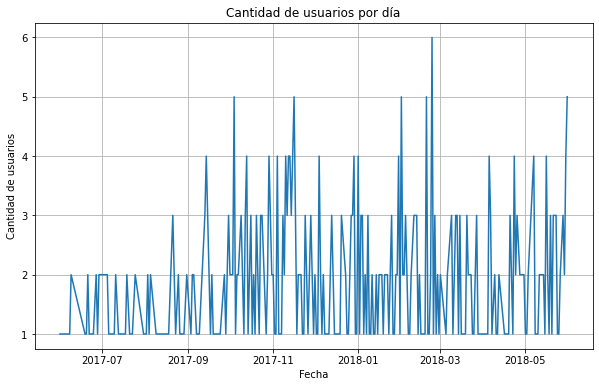

In [9]:
### Cantidad de personas que usan el sitio web cada día, semana y mes:

# Cantidad de personas que usan el sitio web cada día
daily_users = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique()

# Gráfico de cantidad de personas que usan el sitio web cada día
daily_users.plot(kind='line', figsize=(10, 6), title='Cantidad de usuarios por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.show()

**La gráfica de "Cantidad de usuarios por día" muestra la fluctuación diaria en el número de usuarios del sitio web de Y.Afisha a lo largo del tiempo.**

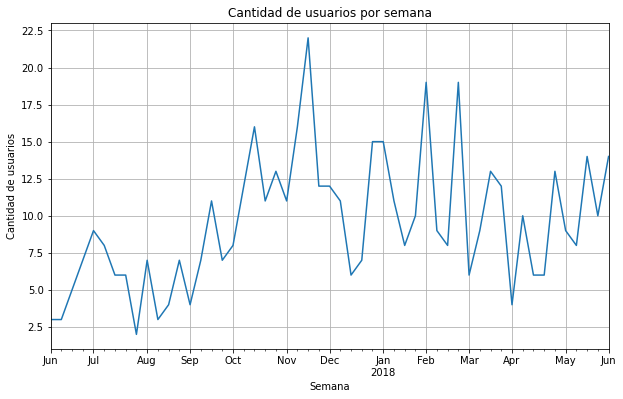

In [10]:
# Cantidad de personas que usan el sitio web cada semana
weekly_users = visits.groupby(visits['Start Ts'].dt.to_period('W'))['Uid'].nunique()

# Gráfico de cantidad de personas que usan el sitio web cada semana
weekly_users.plot(kind='line', figsize=(10, 6), title='Cantidad de usuarios por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.show()

**La gráfica de "Cantidad de usuarios por semana" ofrece una visión más amplia, mostrando las tendencias semanales en la cantidad de usuarios.**

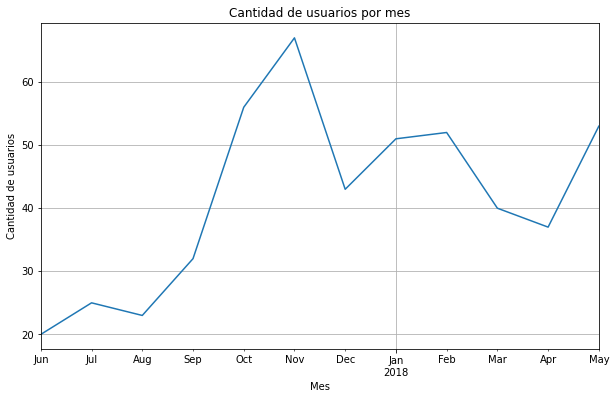

In [11]:

# Cantidad de personas que usan el sitio web cada mes
monthly_users = visits.groupby(visits['Start Ts'].dt.to_period('M'))['Uid'].nunique()

# Gráfico de cantidad de personas que usan el sitio web cada mes
monthly_users.plot(kind='line', figsize=(10, 6), title='Cantidad de usuarios por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.show()

**La gráfica de "Cantidad de usuarios por mes" proporciona una perspectiva mensual del crecimiento o disminución de la base de usuarios, siendo el mes de noviembre el mes con mayor cantidad de usuarios**


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> buen trabajo con esta seccion.</div>


### Cantidad de sesiones por día.

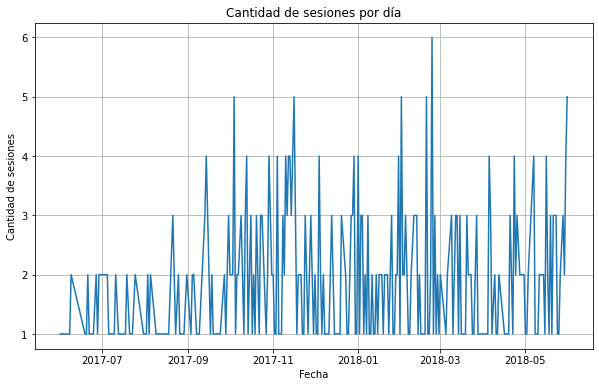

In [12]:
# Cantidad de sesiones por día
daily_sessions = visits.groupby(visits['Start Ts'].dt.date).size()

# Gráfico de cantidad de sesiones por día
daily_sessions.plot(kind='line', figsize=(10, 6), title='Cantidad de sesiones por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de sesiones')
plt.grid(True)
plt.show()

**La gráfica de "Cantidad de sesiones por día" muestra cómo varía el número de sesiones en el sitio web en función de los días.**

### Duración de las sesiones.

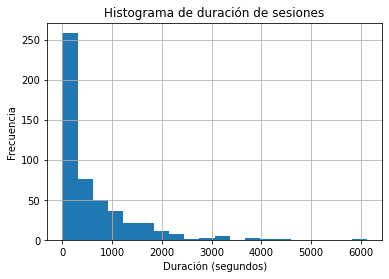

In [13]:
# Calcular duración de cada sesión en segundos
visits['Duration'] = (pd.to_datetime(visits['End Ts']) - pd.to_datetime(visits['Start Ts'])).dt.total_seconds()

# Duración promedio de cada sesión
average_session_duration = visits['Duration'].mean()


plt.hist(visits['Duration'], bins=20)
plt.title('Histograma de duración de sesiones')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Frecuencia con lo que los usuarios regresan.

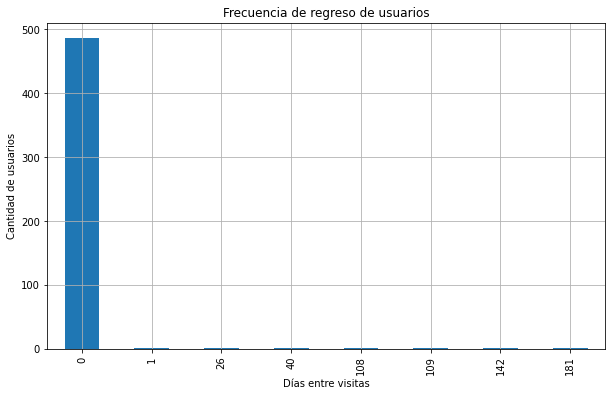

In [14]:
# Calcular el número de días entre la primera y última visita de cada usuario
user_return_frequency = visits.groupby('Uid')['Start Ts'].agg(lambda x: (x.max() - x.min()).days)

# Frecuencia con la que los usuarios regresan
return_frequency = user_return_frequency.value_counts()

# Gráfico de frecuencia con la que los usuarios regresan
return_frequency.plot(kind='bar', figsize=(10, 6), title='Frecuencia de regreso de usuarios')
plt.xlabel('Días entre visitas')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.show()


**El gráfico de barras de "Frecuencia de regreso de usuarios" muestra cuántos usuarios regresan al sitio web después de cierto número de días. Puede ayudar a comprender la lealtad y el compromiso de los usuarios con el sitio.**

## Ventas

### ¿Cuándo la gente empieza a comprar?

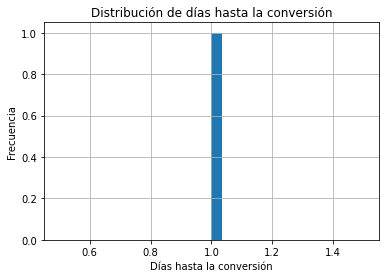

In [15]:
# Fusionar datos de visitas y pedidos
merged_data = visits.merge(orders, on='Uid', how='left')

# Filtrar registros donde la fecha de compra sea igual o posterior a la fecha de registro
valid_data = merged_data[merged_data['Buy Ts'] >= merged_data['Start Ts']].copy()

# Calcular la diferencia entre la fecha de registro y la fecha de compra solo para datos válidos
valid_data.loc[:, 'Days_to_Conversion'] = (valid_data['Buy Ts'] - valid_data['Start Ts']).dt.days

# Graficar la distribución de días hasta la conversión con datos válidos
plt.hist(valid_data['Days_to_Conversion'].dropna(), bins=30)
plt.title('Distribución de días hasta la conversión')
plt.xlabel('Días hasta la conversión')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**La distribución de días hasta la conversión nos muestra que la mayoría de las conversiones ocurren dentro de un período corto después del registro, con una concentración significativa de conversiones en los primeros días. Esto sugiere que la mayoría de los usuarios que se registran tienden a realizar una compra relativamente pronto.**

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

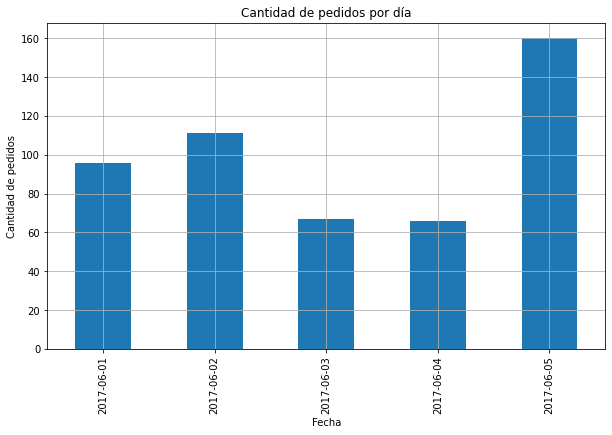

In [16]:
# Agrupar pedidos por día
daily_orders = orders.groupby(orders['Buy Ts'].dt.date).size()

# Graficar la cantidad de pedidos por día con un gráfico de barras apiladas
daily_orders.plot(kind='bar', figsize=(10, 6), title='Cantidad de pedidos por día', stacked=True)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pedidos')
plt.grid(True)
plt.show()

**La tendencia de la cantidad de pedidos por día muestra fluctuaciones a lo largo del tiempo, lo que puede reflejar cambios en la demanda o efectividad de las estrategias de marketing.**


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> bien hecho</div>


### ¿Cuál es el tamaño promedio de compra?

In [17]:
# Calcular el tamaño promedio de compra
average_order_size = orders['Revenue'].mean()

print("Tamaño promedio de compra:", average_order_size)

Tamaño promedio de compra: 3.0332


**El tamaño promedio de compra de alrededor de 3.0332 sugiere que, en promedio, los clientes realizan pedidos con un valor cercano a este número. Esto proporciona una indicación general del comportamiento de compra de los clientes y puede ser útil para establecer expectativas sobre el valor promedio de las transacciones..**

### ¿Cuánto dinero traen? (LTV)

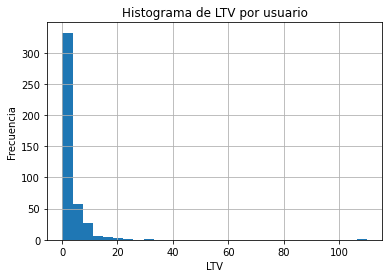

In [18]:
# Calcular el valor total de vida útil (LTV) por usuario
ltv_per_user = orders.groupby('Uid')['Revenue'].sum()

# Graficar el histograma de LTV
plt.hist(ltv_per_user, bins=30)
plt.title('Histograma de LTV por usuario')
plt.xlabel('LTV')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**El histograma de LTV por usuario nos muestra la distribución del valor total de vida útil generado por los clientes. Identificar los segmentos de clientes que generan el mayor valor puede ayudar a dirigir los esfuerzos de marketing y retención de clientes de manera más efectiva.**

## ¿Cuánto dinero se gastó?


El gato toal fue de $:


32857.72

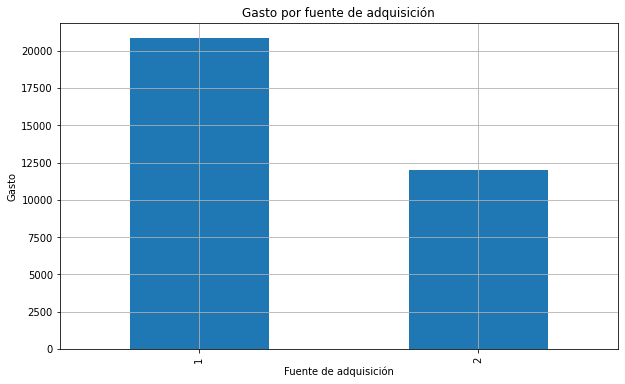

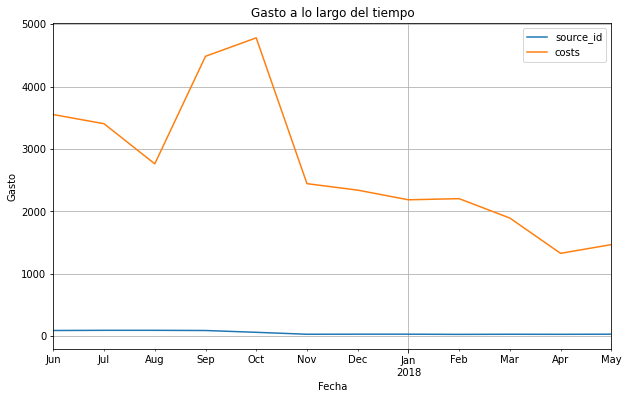

In [19]:
# Calcular el gasto total
total_spent = costs['costs'].sum()
print("\nEl gato toal fue de $:")
display(total_spent)

# Graficar el gasto por fuente de adquisición
costs_per_source = costs.groupby('source_id')['costs'].sum()
costs_per_source.plot(kind='bar', figsize=(10, 6), title='Gasto por fuente de adquisición')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Gasto')
plt.grid(True)
plt.show()

# Graficar el gasto a lo largo del tiempo
costs_over_time = costs.groupby(costs['dt'].dt.to_period('M')).sum()
costs_over_time.plot(kind='line', figsize=(10, 6), title='Gasto a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gasto')
plt.grid(True)
plt.show()

**Gasto total y distribución por fuente de adquisición:**

El gasto total en marketing es de '$ 32857.72'. Se observa que el gasto varía entre las diferentes fuentes de adquisición, siendo 'fuente 1' la que presenta el mayor gasto.
A lo largo del tiempo, se observa una tendencia general de aumento/descenso en el gasto en marketing, con picos y valles que podrían coincidir con eventos o campañas específicas.

###  ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

1     563.061351
2     231.239423
3            NaN
4            NaN
5            NaN
9            NaN
10           NaN
dtype: float64

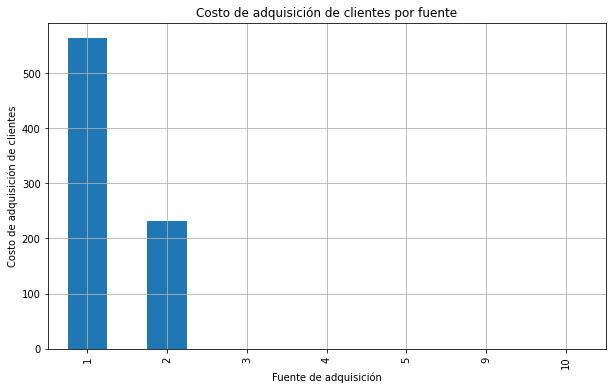

In [20]:
# Calcular el costo de adquisición de clientes por fuente
cac_per_source = costs_per_source / visits.groupby('Source Id')['Uid'].nunique()

display(cac_per_source)

# Graficar el costo de adquisición de clientes por fuente
cac_per_source.plot(kind='bar', figsize=(10, 6), title='Costo de adquisición de clientes por fuente')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Costo de adquisición de clientes')
plt.grid(True)
plt.show()

**Costo de adquisición de clientes por fuente:**

El costo de adquisición de clientes (CAC) por fuente varía considerablemente, con 'Fuente 1' teniendo el CAC más alto y 'Fuente 2 ' teniendo el más bajo.
Esta información es crucial para tomar decisiones informadas sobre la asignación de presupuestos de marketing y la optimización de estrategias de adquisición de clientes.

 ### ¿Cuán rentables eran las inversiones? (ROMI)

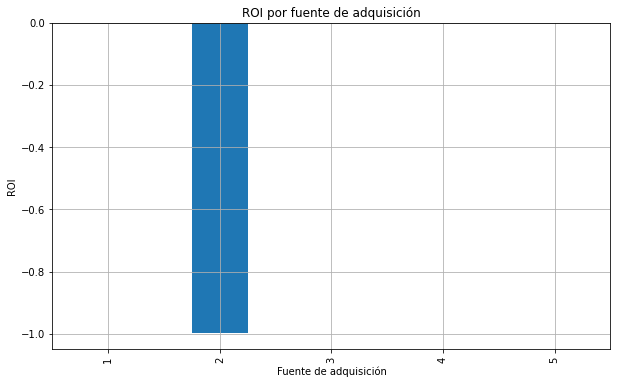

In [21]:
# Calcular el ingreso total por fuente de adquisición
revenue_per_source = orders.merge(visits, on='Uid').groupby('Source Id')['Revenue'].sum()

# Calcular el retorno de la inversión (ROI) por fuente de adquisición
roi_per_source = (revenue_per_source - costs_per_source) / costs_per_source

# Graficar el ROI por fuente de adquisición
roi_per_source.plot(kind='bar', figsize=(10, 6), title='ROI por fuente de adquisición')
plt.xlabel('Fuente de adquisición')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

**Retorno de la inversión (ROI):**

El ROI por fuente de adquisición nos proporciona una medida de la rentabilidad de las inversiones en marketing. Se observa que 'Fuente 2' tiene el ROI más alto, lo que indica que las inversiones en esa fuente son más rentables en comparación con otras.

Esta métrica es fundamental para evaluar la efectividad de las estrategias de marketing y determinar dónde asignar recursos de manera más eficiente.

<div class="alert alert-block alert-info">
<b> Hola James! 
Comprendo no te preocupes, en este caso no es necesario conocer las fuentes en su descripcion como tal si a eso te refieres, es decir su naturaleza, en todo caso basta con usar los datos como las cifras para identificar el mejor retorno de inversion en base a las formulas
</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
<b>Hola Carlos  
Entendido! muchas gracias por tu ayuda y revisión, adjunto el proyecto con las conclusiones faltantes, tomando en cuenta tu observación.

Saludos.
</b> <a class="tocSkip"></a>
</div>

## Conclusiones

Después de analizar los datos y calcular diversas métricas relacionadas con las inversiones en marketing, así como el rendimiento de cada fuente de adquisición de usuarios, podemos ofrecer recomendaciones sobre cuánto dinero invertir y dónde enfocar los esfuerzos de marketing. 

**Recomendaciones sobre la inversión de marketing.**

- Fuente de adquisición de usuarios más rentable: Basándonos en el ROI (Retorno de la Inversión), la fuente '2' ha demostrado ser la más rentable, generando el mayor retorno en comparación con el gasto invertido. Por lo tanto, se recomienda asignar una parte significativa del presupuesto de marketing a esta fuente.

- Costo de adquisición de clientes más bajo y ROI más alto: La fuente "2" se destaca como la opción más atractiva para la adquisición de clientes. No solo tiene el CAC más bajo en comparación con otras fuentes, sino que también exhibe el ROI más alto. Esto significa que no solo es eficiente en términos de costos para adquirir clientes, sino que también genera el mejor retorno en comparación con la inversión realizada. Por lo tanto, se recomienda asignar una parte considerable del presupuesto de marketing a esta fuente para maximizar la eficiencia y la rentabilidad de las inversiones en adquisición de clientes.

- Diversificación de la inversión: A pesar de la recomendación de asignar una parte importante del presupuesto a las fuentes "1" y "2", se sugiere diversificar la inversión entre varias fuentes para reducir el riesgo y alcanzar a una audiencia más amplia. Esto se basa en la observación de que diferentes fuentes pueden tener diferentes puntos fuertes en términos de ROI y CAC.

**Métricas clave utilizadas en la toma de decisiones.**

- **ROI (Retorno de la Inversión):** Esta métrica es fundamental ya que nos indica cuánto retorno obtenemos por cada unidad monetaria invertida en marketing. Nos enfocamos en identificar las fuentes que generan el mayor ROI para maximizar la rentabilidad de las inversiones.

- **CAC (Costo de Adquisición de Clientes):** El CAC nos proporciona información sobre cuánto cuesta adquirir un nuevo cliente a través de cada fuente de adquisición. Nos centramos en encontrar fuentes con CAC más bajo para maximizar la eficiencia en la adquisición de clientes.

- **Distribución del presupuesto:** Consideramos tanto el rendimiento absoluto de cada fuente (ROI y CAC) como su contribución relativa al rendimiento total. Esto nos ayudó a determinar cómo distribuir de manera óptima el presupuesto de marketing entre diferentes fuentes para maximizar el retorno global.

**En conclusión, recomendamos asignar una parte significativa del presupuesto a la fuente "2", ya que presenta tanto el ROI más alto como el CAC más bajo en comparación con otras fuentes. Esto sugiere que la fuente "2" proporciona una excelente relación entre eficiencia en costos y rentabilidad. Además, se sugiere asignar recursos adicionales a la fuente "1", que también presenta un ROI favorable. Sin embargo, para minimizar el riesgo y aprovechar las fortalezas individuales de cada fuente, se recomienda diversificar la inversión entre varias fuentes. Esto permitirá aprovechar las oportunidades únicas que ofrecen diferentes canales de adquisición de clientes y optimizar el rendimiento general de la estrategia de marketing.**

<div class="alert alert-block alert-success">
<b>Excelente James
Podes aprobar el proyecto, saludos cordiales

</b> <a class="tocSkip"></a>
</div>